# Fitness club

# Tasks:

* make prediction model of customer churn;
* make a client segmentation;
* find general customer signts which have strongly influencing on customer churn;
* make conclusions.

# Data description 
'gender' — gender;

'Near_Location' — place of living or work;

'Partner' —  employeer of company-partner ;

Promo_friends — indetificator of promo action;

'Phone' — phone number;

'Age' — age;

'Lifetime' — lifetime (month);

'Contract_period' — duration of the current active subscription;

'Month_to_end_contract' — until the end of the current active subscription;

'Group_visits' — fact of visiting group classes;

'Avg_class_frequency_total' — avarage visits ;

'Avg_class_frequency_current_month' — avarage visits per week of last month;

'Avg_additional_charges_total' — summary revenue from another services of fitness club;

'Churn' — churn.

# EDA

Import libraries:

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Read file

In [2]:
try:
    df = pd.read_csv('/datasets/gym_churn.csv')
except:
    df = pd.read_csv('/Users/andrejlesov/Downloads/gym_churn.csv')

In [3]:
display(df)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.duplicated().sum()

0

No duplicates

In [6]:
df = df.rename(columns={'gender' : 'Gender'}) # rename column

# Conclusions: 
* No misses data
* No duplicates

Compare clients who stay in club and who leave

In [7]:
df.groupby('Churn').mean().T

Churn,0,1
Gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Who stay: 
* have a corporate discount (Partner);
* promo participant;
* visit group classes;
* have 6 month contract;
* spend more money for other services;
* just started;
* visit gym 2 times a week.

Churn:

* have 2 month left contract;
* if client visited gym during 1st month only;
* visit gym 1 time a week.

Histogram's of churn and stay client.

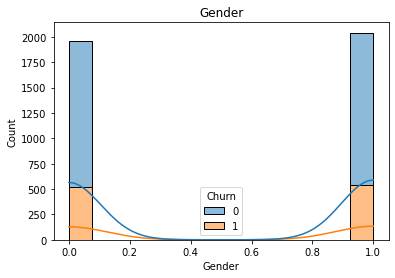

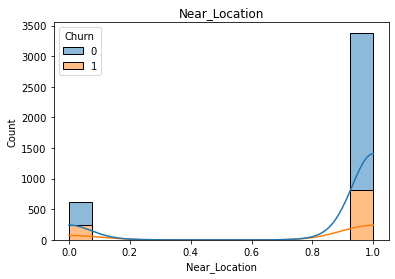

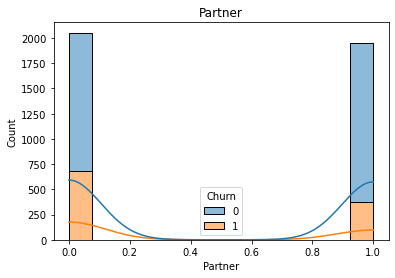

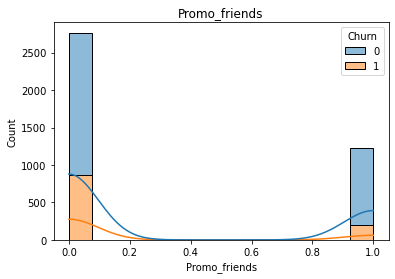

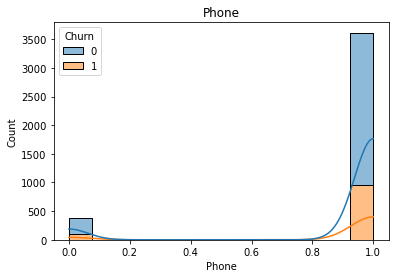

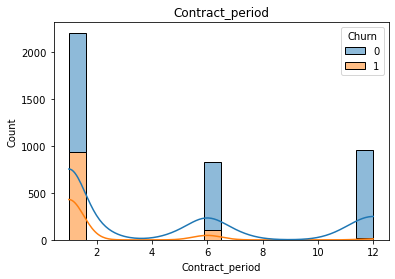

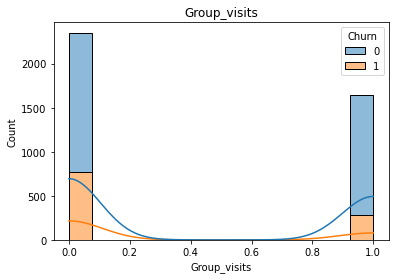

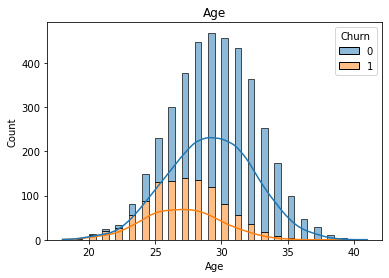

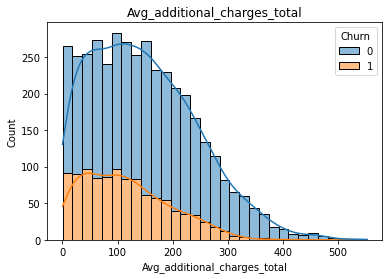

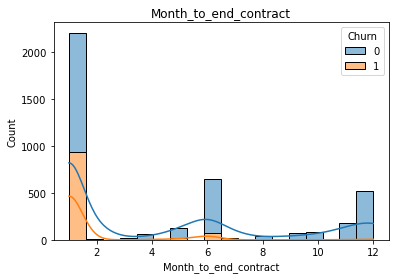

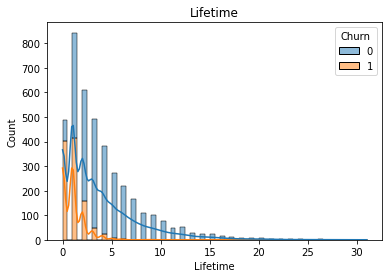

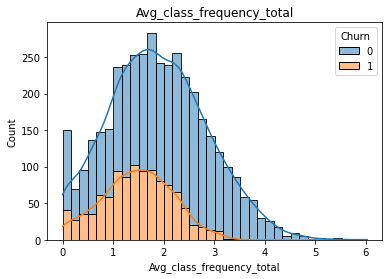

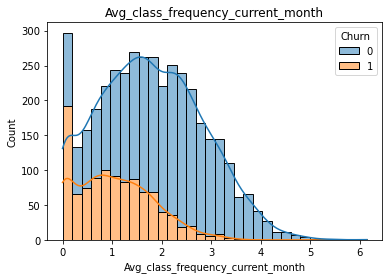

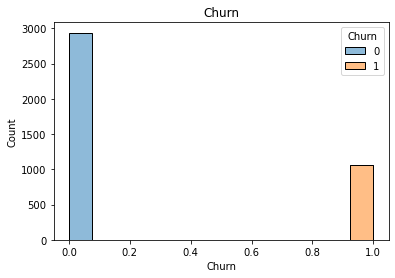

In [8]:
for feature in df.columns:
    sns.histplot(data=df, x=feature, hue='Churn', kde=True, multiple="stack");
    plt.title(feature)
    plt.show(); 

* Most of clients who live or work near the gym are stay.
* 50% have promocode.
* Most of clients gave phone number;
* 50% of clients have 1 month contract. 25% percent have 6 month contract and 25% have a year contract;
* Older clients rarly leave.

Corralation matrix.

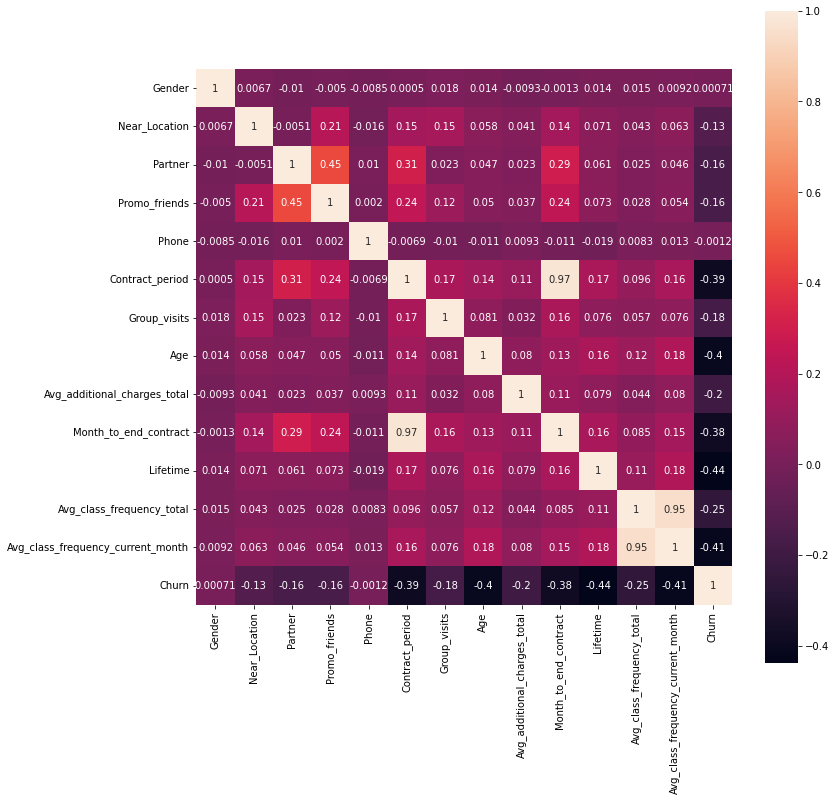

In [9]:
df_corr = df.corr() 


plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, square=True);

Highly correlated features:

* Average time until the end of the current active subscription - the duration of the current active subscription (month, 6 months, year);
* Average frequency of visits per week since the beginning of the subscription - the average frequency of visits per week for the previous month.

# Prediction model.

In [10]:
X = df.drop(columns='Churn')
y = df['Churn']

In [11]:

scaler = StandardScaler()
scaler.fit(X) 
X_st = scaler.transform(X)

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.2, random_state=0)

In [13]:

models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0),
]



def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        '\tAccuracy:{:.2f}\n\tPrecision:{:.2f}\n\tRecall:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
         )
    )



for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
    )

LogisticRegression(random_state=0)
	Accuracy:0.92
	Precision:0.85
	Recall:0.83 
RandomForestClassifier(random_state=0)
	Accuracy:0.92
	Precision:0.84
	Recall:0.81 


Accuracy same in both models.

In [14]:
final_model = RandomForestClassifier(random_state=0)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)


importances = final_model.feature_importances_ 
table = pd.DataFrame(X.columns, columns = ['feature'])
table['importance'] = importances
print(table.sort_values(by='importance', ascending=False))

                              feature  importance
10                           Lifetime    0.276499
12  Avg_class_frequency_current_month    0.180170
11          Avg_class_frequency_total    0.129883
7                                 Age    0.119129
8        Avg_additional_charges_total    0.091473
9               Month_to_end_contract    0.068855
5                     Contract_period    0.065964
6                        Group_visits    0.015652
0                              Gender    0.012425
2                             Partner    0.012285
3                       Promo_friends    0.012053
1                       Near_Location    0.009421
4                               Phone    0.006192


The most significant signs:
* time since the first call
* average attendance per month
* age

# Clastorization

In [15]:
linked = linkage(X_st, method='ward')

In [ ]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()


To train the K-Means model, I will assign 5 clusters. Judging by the dendrogram, the sixth cluster can also be distinguished. I will train a clustering model based on the K-Means algorithm and make a prediction of customer clusters.

In [ ]:

km = KMeans(n_clusters=5, random_state=0)

labels = km.fit_predict(X_st)


df['Cluster_client'] = labels

In [ ]:

clusters = df.groupby(['Cluster_client']).mean()
clusters.T.style.format('{:.2f}', na_rep='-')

* clients of the second group live far from sports. club;
* the zero group came through the affiliate program;
* the second group has no promotional codes from friends, and the zero one has the most of them;
* the first group did not give a phone number;
* zero and fourth groups spend the most on additional services;
* the most time after contacting the fitness center was at zero, first and fourth;
* the second and third groups go least often;
* high churn groups: 2, 3.
* groups with minimal churn: 0.3.

In [ ]:
for feature in df.columns:
    sns.histplot(data=df, x=feature, hue='Cluster_client', kde=True, multiple="stack");
    plt.title(feature)
    plt.show();

# The zero group is characterized by:

* live or work near the club;
* most of it is in the affiliate program;
* few customers have promotional codes from friends;
* have 12-month contracts;
* older than other groups;
* many clients who have 12 months left before the end of the contract - it turns out that in this group, clients have just started to engage and it cannot be indicative for determining the reasons for the outflow;
* good lifetime.
# The first group is characterized by:

* live or work near the club;
* many customers have promotional codes from friends;
* did not leave a phone number;
* mostly have a monthly contract;
* Significant churn.
# The second group is characterized by:

* live or work near the club;
* many customers have promotional codes from friends;
* fewer other groups go to group classes;
* mostly have a monthly contract;
* less often than other clusters go to the club;
* large outflow.

# The third group is characterized by:

* a significant part lives or works far from the fitness center;
* most of it is in the affiliate program;
* many customers have promotional codes from friends;
* fewer other groups go to group classes;
* mostly have a monthly contract;
* less often than other clusters go to the club;
* a significant number of customers who stop walking a month before the churn;
* large outflow.
# The fourth group is characterized by:

* live or work near the club;
* most of it is in the affiliate program;
* many customers have promotional codes from friends;
* mostly have a monthly contract;
* older than other groups;
* spends the most on extras. services;
* lifetime is the largest and most "smoothed"
* go regularly to the club.

In [ ]:
df_cluster = df.groupby(['Cluster_client'])['Gender'].count().reset_index()
df_churn = df.groupby(['Cluster_client', 'Churn'])['Near_Location'].count().reset_index()
df_churn = df_churn.merge(df_cluster)
df_churn
df_churn.columns = ['Cluster', 'Churn', "Churn_clients", "Claster_clients"]
df_churn['proportion, %'] = df_churn['Churn_clients']/df_churn['Claster_clients']
df_churn.style.format({'proportion, %': '{:.2%}'})

The second and third clusters are more prone to outflow. A significant outflow is observed in the first cluster. The most loyal customers are concentrated in clusters 0 and 4.

Outflow clusters (2, 3) are characterized by the following features:

* have promo from friends;
* go to group classes a little;
* monthly contract;
* younger age;
* small lifetime;
* low frequency of use of the club.

# Conclusions and recommendations

* A preliminary analysis of the data was carried out:

No data gaps found;

6 signs are binary, not including the target;

The average age of clients is 29 years.

* A study of average scores of signs showed the following:

Outflow is on average less if:
    
clients are employees of companies thanks to which they have discounts for subscription ('Partner');

there is a fact of initial registration within the framework of the “bring a friend” promotion;

the client attends group classes;

contract period 6 months;

spend more on other services;

the client has just started walking;

the client goes to the club for 4 months from the beginning of the first treatment;

the client goes to the club on average 2 times a week.

* Churn is higher on average if (non-binary features):
    
2 months left before the end of the contract;

the client goes to the club only within 1 month from the beginning of the first treatment;

the client goes to the club on average once a week.

* A study of the distribution of customers by characteristics showed:

Many more customers will live or work in the area where the fitness center is located. Customers who live and work nearby are less likely to churn.

Approximately half of the customers received promotional codes from friends. With promotional codes, the outflow is less.

The vast majority gave a contact phone number;

Half of the clients have monthly subscriptions. The 6-month and 12-month contracts are roughly evenly distributed and have minimal churn.

With age, the proportion of churn decreases.

The frequency of visits a month before the outflow increases significantly.

A customer churn model was built. The random forest model turned out to be slightly more accurate.

Clustering of clients into 5 groups was carried out:

* The zero group is characterized by:


live or work near the club;

most of it is in the affiliate program;

few customers have promotional codes from friends;

have 12-month contracts;

older than other groups;

many clients who have 12 months left before the end of the contract - it turns out that in this group many clients have just started to engage;
good lighttime.
* The first group is characterized by:


live or work near the club;

many customers have promotional codes from friends;

did not leave a phone number;

mostly have a monthly contract;

significant outflow.

* The second group is characterized by:

live or work near the club;

many customers have promotional codes from friends;

fewer other groups go to group classes;

mostly have a monthly contract;

less often than other clusters go to the club;

big outflow.

* The third group is characterized by:

a significant proportion live or work far from the fitness center;

most of it is in the affiliate program;

many customers have promotional codes from friends;

fewer other groups go to group classes;

mostly have a monthly contract;

less often than other clusters go to the club;

a significant number of customers who stop walking a month before the churn;

big outflow.

* The fourth group is characterized by:

live or work near the club;

most of it is in the affiliate program;

many customers have promotional codes from friends;

mostly have a monthly contract;

older than other groups;

spends the most on extras. services;

lifetime is the largest and most "smoothed"

go regularly to the club.

* Outflow clusters (2, 3) are characterized by the following features:

have a promo from friends;

go to group classes a little;

have a monthly contract;

are younger;

a short period of time from the moment of the first visit to the fitness center;

low frequency of use of the club.

# Recommendations

Exhaust clients usually only have a one-month membership and seem to have little initial motivation to visit the club regularly. Such clients should be motivated to switch to a longer contract. How can this be done? Here are some suggestions:

Make a simple discount at the end of the monthly subscription.

Make a discount on long-term contracts, add. services subject to regular visits to the club. So, perhaps, it will be possible to motivate, interest and develop the habit of regular sports activities with the client.

You can determine the size of the discount depending on the number of additional services taken for this month.

Develop promotions.